In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# To show the complete datase on printing the dataframe.
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

In [3]:
#Load the dataset
dataset=pd.read_csv('day.csv', index_col=0)
dataset_backup=dataset.copy()
# dataset=dataset_backup.copy()

In [4]:
#Print the sample data
dataset.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822


In [5]:
#Print the dataset shape
dataset.shape

(731, 15)

In [6]:
#Dataset characterstics
dataset.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
#Dataset column names
dataset.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [8]:
#Catagorizing the data into catagorical, continious, and target variables
cont_vars=['temp', 'atemp', 'hum', 'windspeed']
cat_vars=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
target_vars=['casual', 'registered', 'cnt']

In [9]:
#variables datatypes
dataset.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
# Print the unique value count for each columns
for column in cont_vars+cat_vars+target_vars:
    print(column, dataset[column].unique().shape[0])

temp 499
atemp 690
hum 595
windspeed 650
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
casual 606
registered 679
cnt 696


# Missing Value Analysis

In [11]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(dataset.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(dataset))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

print(missing_val)

     Variables  Missing_percentage
0       dteday                 0.0
1       season                 0.0
2           yr                 0.0
3         mnth                 0.0
4      holiday                 0.0
5      weekday                 0.0
6   workingday                 0.0
7   weathersit                 0.0
8         temp                 0.0
9        atemp                 0.0
10         hum                 0.0
11   windspeed                 0.0
12      casual                 0.0
13  registered                 0.0
14         cnt                 0.0


# Outlier Analysis

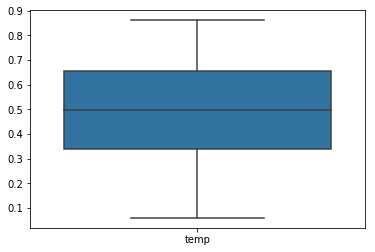

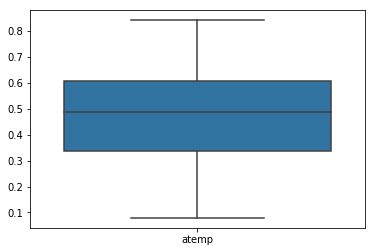

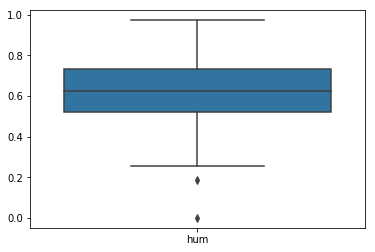

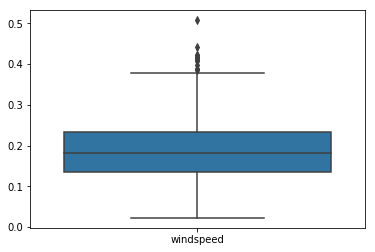

In [12]:
# Plot box plot for each of the column to check the outliers
for i in [8, 9, 10, 11]:
    sb.boxplot(data=dataset.iloc[:,i:i+1])
    plt.savefig('./outlier/'+dataset.columns[i]+'.png')
    plt.show()

In [13]:
# Replace the outliers with the nan and print how many outliers are there in each column.
remove=False
print("NaN count before outlier detection=",dataset.isnull().sum().sum())
columns=dataset.columns
for i in [8, 9, 10, 11]:
    initial=dataset.isnull().sum().sum()
    q25, q75=dataset.iloc[:,i].quantile(0.25), dataset.iloc[:,i].quantile(0.75)
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    if remove:
#         dataset = dataset.drop(dataset[dataset.iloc[:,i] < min_val].index)
#         dataset = dataset.drop(dataset[dataset.iloc[:,i] > max_val].index)
        print("For column",columns[i],"number of outliers replaced with NaN=",dataset.isnull().sum().sum()-initial)
    else:
        print("For column",columns[i], "max_val=",max_val, 'min_val=',min_val)
        print(dataset.loc[dataset[columns[i]]<min_val,columns[i]])
        print(dataset.loc[dataset[columns[i]]>max_val,columns[i]])
#         dataset.loc[dataset[columns[i]]<min_val,columns[i]] = np.nan
#         dataset.loc[dataset[columns[i]]>max_val,columns[i]] = np.nan
        print("For column",columns[i],"number of outliers replaced with NaN=",dataset.isnull().sum().sum()-initial)
print("NaN count after outlier detection=",dataset.isnull().sum().sum())

NaN count before outlier detection= 0
For column temp max_val= 1.1329160000000003 min_val= -0.14041600000000015
Series([], Name: temp, dtype: float64)
Series([], Name: temp, dtype: float64)
For column temp number of outliers replaced with NaN= 0
For column atemp max_val= 1.0147412500000002 min_val= -0.06829675000000018
Series([], Name: atemp, dtype: float64)
Series([], Name: atemp, dtype: float64)
For column atemp number of outliers replaced with NaN= 0
For column hum max_val= 1.0455212500000002 min_val= 0.20468725
instant
50    0.187917
69    0.000000
Name: hum, dtype: float64
Series([], Name: hum, dtype: float64)
For column hum number of outliers replaced with NaN= 0
For column windspeed max_val= 0.38061125 min_val= -0.012446750000000034
Series([], Name: windspeed, dtype: float64)
instant
45     0.417908
50     0.507463
94     0.385571
95     0.388067
293    0.422275
383    0.415429
408    0.409212
421    0.421642
433    0.441563
434    0.414800
451    0.386821
667    0.398008
722   

# Special Cases?

In [14]:
dataset_backup.loc[[45,50,69,94,95,293,383,408,421,433,434,451,667,722],:]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
95,2011-04-05,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795
293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
383,2012-01-18,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376
408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
421,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732


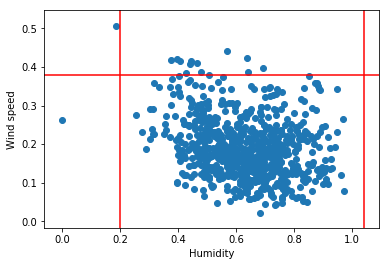

In [15]:
#Ploting the Wind speed vs Humidity graph with lower and upper bound values.
plt.scatter(dataset_backup.hum.values, dataset_backup.windspeed.values)
plt.axhline(y=0.38, color='red')
plt.axvline(x=0.2, color='red')
plt.axvline(x=1.04, color='red')
plt.xlabel('Humidity')
plt.ylabel('Wind speed')
plt.show()

In [16]:
#Droping the outlier
dataset=dataset.drop(index=[69], axis=0)
print(dataset.shape)

(730, 15)


# Visualization

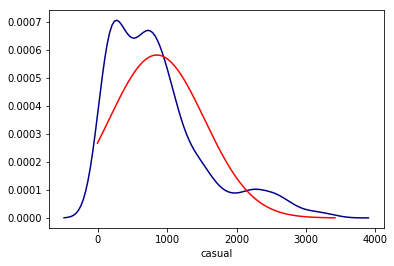

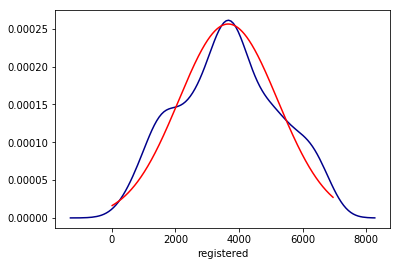

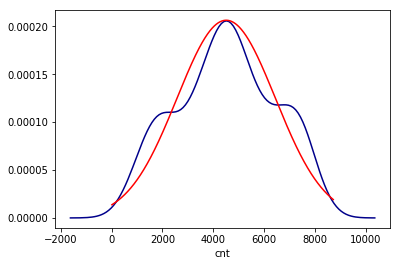

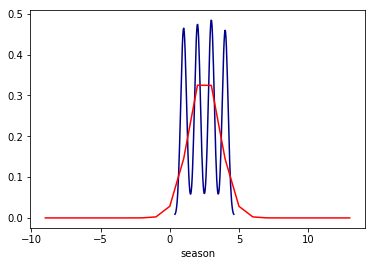

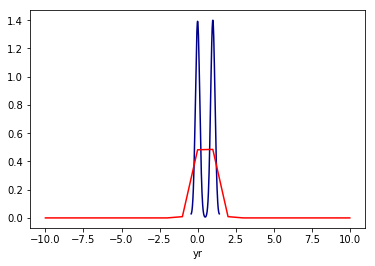

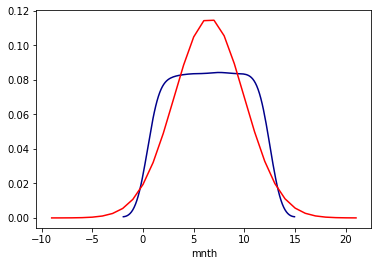

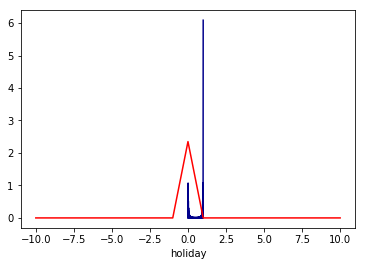

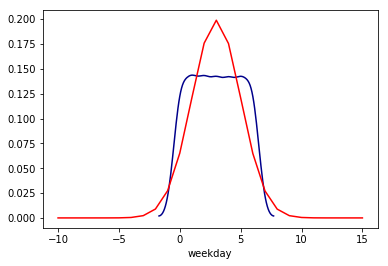

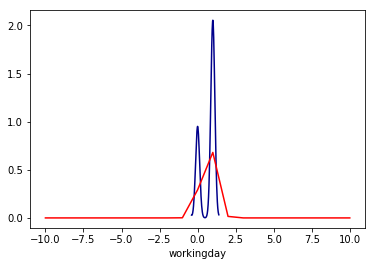

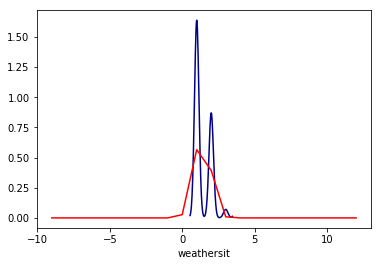

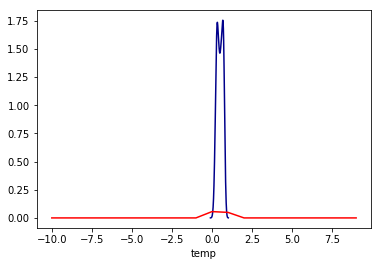

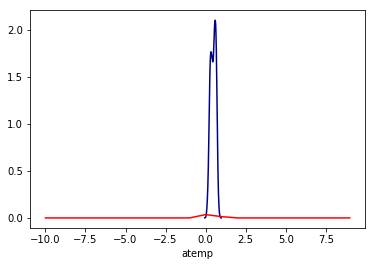

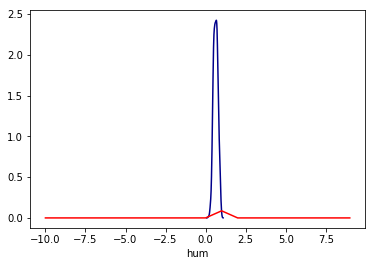

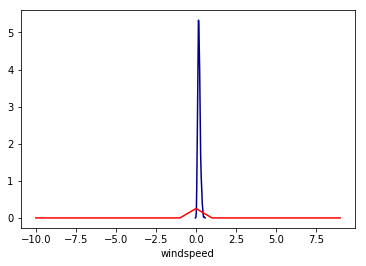

In [17]:
#Blue line to show the data distribution and red line for the normal distribution of the curve
for column in target_vars+cat_vars+cont_vars:
    sb.distplot(dataset[column], hist=False, kde=True, 
             bins=dataset[column].unique().size, color = 'darkblue')
    bins=np.array(range(int(min(dataset[column]))-10,int(max(dataset[column]))+10))
    mu,sigma=dataset[column].mean(),dataset[column].std()
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),color='red')
    plt.savefig('./univariate analysis/'+column.replace('/',' ')+'.png')
    plt.show()

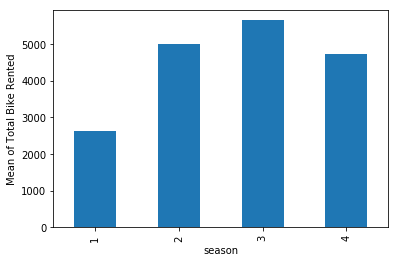

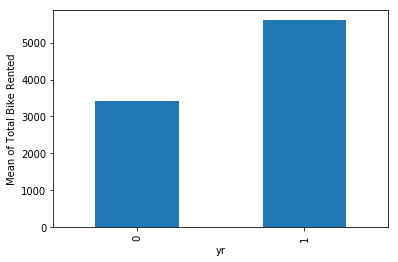

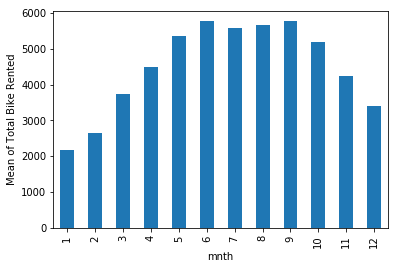

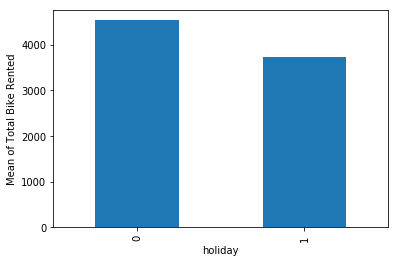

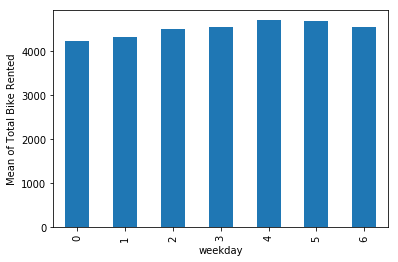

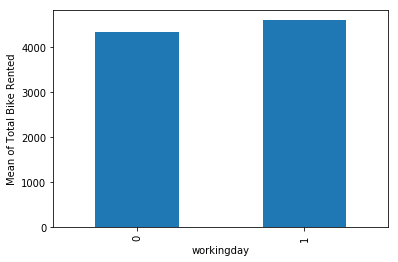

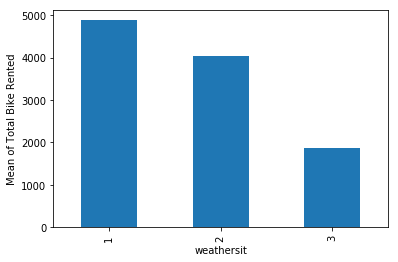

In [18]:
for col in cat_vars:
#     dataset.groupby([col])['cnt'].count().plot.bar()
#     plt.ylabel('Count of '+col)
#     plt.savefig('./visualization/'+col+'_count.png')
#     plt.show()
#     dataset.groupby([col])['cnt'].sum().plot.bar()
#     plt.ylabel('Sum of '+col)
#     plt.savefig('./visualization/'+col+'_sum.png')
#     plt.show()
    dataset.groupby([col])['cnt'].mean().plot.bar()
    plt.ylabel('Mean of Total Bike Rented')
    plt.savefig('./visualization/'+col+'_mean.png')
    plt.show()

# Feature Selection

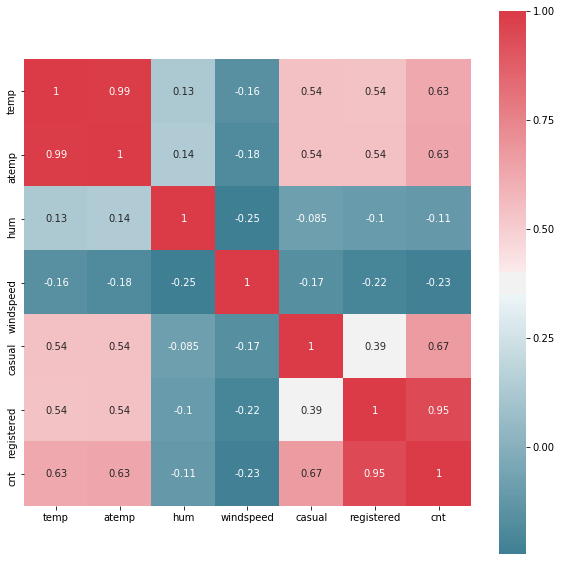

In [19]:
#Plot the correlation matrix
f, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(dataset[cont_vars+target_vars].corr(), mask=np.zeros_like(dataset[cont_vars+target_vars].corr(), dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True,ax=ax,annot=True)
plt.show()

In [20]:
# Droping the instant which is ID and dteday column as the data incorporated by it is already in year and 
# month columns
dataset=dataset.drop(labels=['dteday', 'temp'], axis=1)
print(dataset.shape)

(730, 13)


# Predicting the values

In [21]:
# defining the error metrics
def MAPE(y_pred, y_true):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
#Spliting the dataset for training and validation set
X_train, X_validation, Y_train, Y_validation=train_test_split(dataset.iloc[:,:-3], dataset.iloc[:,-1], test_size=0.3, random_state=3)
print(X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape)

(511, 10) (219, 10) (511,) (219,)


In [23]:
#Applying the random forest on total bike rentals
name='Random Forest'
model = RandomForestRegressor(n_estimators=25, max_depth=18, random_state=1, min_samples_leaf=1, min_samples_split=10 )
model.fit(X_train,Y_train)
predictions_train_1=model.predict(X_train)
print("Training R2 Score by",name ,model.score(X_train,Y_train))
print("Training RMSE by",name,mean_squared_error(Y_train,predictions_train_1)**0.5)
print("Training MAPE by",name,MAPE(predictions_train_1, Y_train.values))
predictions_validation_1=model.predict(X_validation)
print("Validation R2 Score by",name,model.score(X_validation,Y_validation))
print("Validation RMSE by",name,mean_squared_error(Y_validation,predictions_validation_1)**0.5)
print("Validation MAPE by",name,MAPE(predictions_validation_1, Y_validation.values))

Training R2 Score by Random Forest 0.9533508118979579
Training RMSE by Random Forest 424.41013617972885
Training MAPE by Random Forest 31.462369350500058
Validation R2 Score by Random Forest 0.8274677273596115
Validation RMSE by Random Forest 768.8333043518553
Validation MAPE by Random Forest 17.037418642378483


In [24]:
#Getting the feature importance
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

            importance
atemp         0.473640
yr            0.284287
season        0.093701
hum           0.049912
mnth          0.032165
weathersit    0.026336
windspeed     0.022859
weekday       0.013067
holiday       0.002231
workingday    0.001802


In [25]:
#Hyper parameter tunning
n_estimators = [25, 50, 75]
max_depth = [10, 11, 12, 13, 14 ,15, 16, 18, 19]
min_samples_leaf = [1, 2, 3, 5, 7, 9]
min_samples_split = [2, 4, 6, 10, 14, 18]

param_grid = dict(n_estimators=n_estimators,
                  max_depth=max_depth,
                  min_samples_leaf=min_samples_leaf,
                  min_samples_split=min_samples_split
                 , random_state=[5])
model=RandomForestRegressor()
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring='neg_mean_squared_error',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(dataset.iloc[:,:-3], dataset.iloc[:,-1])

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


/home/sanket/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  1.9min


Best Score:  -1576288.2071430297
Best Params:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25, 'random_state': 5}


[Parallel(n_jobs=-1)]: Done 2916 out of 2916 | elapsed:  2.2min finished
/home/sanket/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
#Applying the XGBoost Regressor on total bike rentals
name='XGBRegressor'
model = XGBRegressor(colsample_bytree=0.8, gamma= 0.3, max_depth= 2, min_child_weight= 5, subsample= 0.8)
model.fit(X_train,Y_train)
predictions_train_2=model.predict(X_train)
print("Training R2 Score by",name ,model.score(X_train,Y_train))
print("Training RMSE by",name,mean_squared_error(Y_train,predictions_train_2)**0.5)
print("Training MAPE by",name,MAPE(predictions_train_2, Y_train.values))
predictions_validation_2=model.predict(X_validation)
print("Validation R2 Score by",name,model.score(X_validation,Y_validation))
print("Validation RMSE by",name,mean_squared_error(Y_validation,predictions_validation_2)**0.5)
print("Validation MAPE by",name,MAPE(predictions_validation_2, Y_validation.values))

Training R2 Score by XGBRegressor 0.9301071016016582
Training RMSE by XGBRegressor 519.493631829153
Training MAPE by XGBRegressor 26.23176560935432
Validation R2 Score by XGBRegressor 0.8592058102240872
Validation RMSE by XGBRegressor 694.5273982922414
Validation MAPE by XGBRegressor 15.022689360341642


In [27]:
#Hyper parameter tunning
param_grid = {'min_child_weight':[1, 2, 4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4,5,8,11], 'random_state':[1]}
model=XGBRegressor()
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring='neg_mean_squared_error',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(dataset.iloc[:,:-3], dataset.iloc[:,-1])

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

/home/sanket/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 3144 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4944 tasks      | elapsed:  2.4min


Best Score:  -732866.4626116287
Best Params:  {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 3, 'min_child_weight': 2, 'random_state': 1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed:  2.8min finished
/home/sanket/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
#Spliting the dataset for training and validation set
X_train, X_validation, Y_train_registered, Y_validation_registered=train_test_split(dataset.iloc[:,:-3], dataset.iloc[:,-2], test_size=0.3, random_state=3)
print(X_train.shape, X_validation.shape, Y_train_registered.shape, Y_validation_registered.shape)

(511, 10) (219, 10) (511,) (219,)


In [29]:
#Applying the random forest on registered bike rentals
name='Random Forest'
model = RandomForestRegressor(n_estimators=25, max_depth=18, random_state=1, min_samples_leaf=1, min_samples_split=10)
model.fit(X_train,Y_train_registered)
predictions_registered_train_1=model.predict(X_train)
print("Training R2 Score by",name ,model.score(X_train,Y_train_registered))
print("Training RMSE by",name,mean_squared_error(Y_train_registered,predictions_registered_train_1)**0.5)
print("Training MAPE by",name,MAPE(predictions_registered_train_1, Y_train_registered.values))
predictions_registered_validation_1=model.predict(X_validation)
print("Validation R2 Score by",name,model.score(X_validation,Y_validation_registered))
print("Validation RMSE by",name,mean_squared_error(Y_validation_registered, predictions_registered_validation_1)**0.5)
print("Validation MAPE by",name,MAPE(predictions_registered_validation_1, Y_validation_registered.values))

Training R2 Score by Random Forest 0.9481421616518408
Training RMSE by Random Forest 358.6106661051497
Training MAPE by Random Forest 27.964668419905635
Validation R2 Score by Random Forest 0.8606237680305661
Validation RMSE by Random Forest 564.3147028141509
Validation MAPE by Random Forest 16.15809160532095


In [30]:
#Applying the XGBoostRegressor on registered bike rentals
name='XGBRegressor'
model = XGBRegressor(colsample_bytree=0.8, gamma= 0.3, max_depth= 2, min_child_weight= 5, subsample= 0.8)
model.fit(X_train,Y_train_registered)
predictions_registered_train_2=model.predict(X_train)
print("Training R2 Score by",name ,model.score(X_train,Y_train_registered))
print("Training RMSE by",name,mean_squared_error(Y_train_registered,predictions_registered_train_2)**0.5)
print("Training MAPE by",name,MAPE(predictions_registered_train_2, Y_train_registered.values))
predictions_registered_validation_2=model.predict(X_validation)
print("Validation R2 Score by",name,model.score(X_validation,Y_validation_registered))
print("Validation RMSE by",name,mean_squared_error(Y_validation_registered, predictions_registered_validation_2)**0.5)
print("Validation MAPE by",name,MAPE(predictions_registered_validation_2, Y_validation_registered.values))

Training R2 Score by XGBRegressor 0.9235884029763031
Training RMSE by XGBRegressor 435.3069851378908
Training MAPE by XGBRegressor 28.478580993922037
Validation R2 Score by XGBRegressor 0.8808490421594816
Validation RMSE by XGBRegressor 521.7659992704981
Validation MAPE by XGBRegressor 14.062612324916692


In [31]:
#Spliting the dataset for training and validation set
X_train, X_validation, Y_train_casual, Y_validation_casual=train_test_split(dataset.iloc[:,:-3], dataset.iloc[:,-3], test_size=0.3, random_state=3)
print(X_train.shape, X_validation.shape, Y_train_casual.shape, Y_validation_casual.shape)

(511, 10) (219, 10) (511,) (219,)


In [32]:
#Applying the random forest on casual bike rentals
name='Random Forest'
model = RandomForestRegressor(n_estimators=25, max_depth=18, random_state=1, min_samples_leaf=1, min_samples_split=10)
model.fit(X_train,Y_train_casual)
predictions_casual_train_1=model.predict(X_train)
print("Training R2 Score by",name ,model.score(X_train,Y_train_casual))
print("Training RMSE by",name,mean_squared_error(Y_train_casual,predictions_casual_train_1)**0.5)
print("Training MAPE by",name,MAPE(predictions_casual_train_1, Y_train_casual.values))
predictions_casual_validation_1=model.predict(X_validation)
print("Validation R2 Score by",name,model.score(X_validation,Y_validation_casual))
print("Validation RMSE by",name,mean_squared_error(Y_validation_casual, predictions_casual_validation_1)**0.5)
print("Validation MAPE by",name,MAPE(predictions_casual_validation_1, Y_validation_casual.values))

Training R2 Score by Random Forest 0.9380755347361546
Training RMSE by Random Forest 179.02657417094932
Training MAPE by Random Forest 55.534188150340945
Validation R2 Score by Random Forest 0.7139426347305398
Validation RMSE by Random Forest 319.67729674366745
Validation MAPE by Random Forest 38.644465566471304


In [33]:
#Applying the random forest on registered bike rentals
name='XGBRegressor'
model = XGBRegressor(colsample_bytree=0.8, gamma= 0.3, max_depth= 2, min_child_weight= 5, subsample= 0.8)
model.fit(X_train,Y_train_casual)
predictions_casual_train_2=model.predict(X_train)
print("Training R2 Score by",name ,model.score(X_train,Y_train_casual))
print("Training RMSE by",name,mean_squared_error(Y_train_casual,predictions_casual_train_2)**0.5)
print("Training MAPE by",name,MAPE(predictions_casual_train_2, Y_train_casual.values))
predictions_casual_validation_2=model.predict(X_validation)
print("Validation R2 Score by",name,model.score(X_validation,Y_validation_casual))
print("Validation RMSE by",name,mean_squared_error(Y_validation_casual, predictions_casual_validation_2)**0.5)
print("Validation MAPE by",name,MAPE(predictions_casual_validation_2, Y_validation_casual.values))

Training R2 Score by XGBRegressor 0.8995005360253132
Training RMSE by XGBRegressor 228.0700413699325
Training MAPE by XGBRegressor 42.07992095051003
Validation R2 Score by XGBRegressor 0.741077930122897
Validation RMSE by XGBRegressor 304.1373531580402
Validation MAPE by XGBRegressor 38.15515572271872


In [34]:
#Adding the casual and registered predictions and testing there performance
name='Random Forest'
predictions_train=predictions_casual_train_1+predictions_registered_train_1
print("Training RMSE by",name,mean_squared_error(Y_train,predictions_train)**0.5)
print("Training MAPE by",name,MAPE(predictions_train, Y_train.values))
predictions_validation=predictions_casual_validation_1+predictions_registered_validation_1
print("Validation RMSE by",name,mean_squared_error(Y_validation,predictions_validation)**0.5)
print("Validation MAPE by",name,MAPE(predictions_validation, Y_validation.values))

Training RMSE by Random Forest 432.63666498078726
Training MAPE by Random Forest 29.08433722899308
Validation RMSE by Random Forest 742.93529810092
Validation MAPE by Random Forest 16.546253443980223


In [35]:
#Taking the predictions from the sum and predictions of total count and taking their averages
name='Random Forest'
predictions_train_ensemble=(predictions_train+predictions_train_1)/2
print("Training RMSE by",name,mean_squared_error(Y_train,predictions_train_ensemble)**0.5)
print("Training MAPE by",name,MAPE(predictions_train_ensemble, Y_train.values))
predictions_validation_ensemble=(predictions_validation+predictions_validation_1)/2
print("Validation RMSE by",name,mean_squared_error(Y_validation,predictions_validation_ensemble)**0.5)
print("Validation MAPE by",name,MAPE(predictions_validation_ensemble, Y_validation.values))

Training RMSE by Random Forest 417.9939562486146
Training MAPE by Random Forest 30.044598318688177
Validation RMSE by Random Forest 741.5534255014708
Validation MAPE by Random Forest 16.457185012902784


In [36]:
#Adding the casual and registered predictions and testing there performance
name='XGBRegressor'
predictions_train=predictions_casual_train_2+predictions_registered_train_2
print("Training RMSE by",name,mean_squared_error(Y_train,predictions_train)**0.5)
print("Training MAPE by",name,MAPE(predictions_train, Y_train.values))
predictions_validation=predictions_casual_validation_2+predictions_registered_validation_2
print("Validation RMSE by",name,mean_squared_error(Y_validation,predictions_validation)**0.5)
print("Validation MAPE by",name,MAPE(predictions_validation, Y_validation.values))

Training RMSE by XGBRegressor 518.5340415254967
Training MAPE by XGBRegressor 26.902463670312326
Validation RMSE by XGBRegressor 680.0804160686172
Validation MAPE by XGBRegressor 14.204155599156437


In [37]:
#Taking the predictions from the sum and predictions of total count and taking their averages
name='XGBRegressor'
predictions_train_ensemble=(predictions_train+predictions_train_2)/2
print("Training RMSE by",name,mean_squared_error(Y_train,predictions_train_ensemble)**0.5)
print("Training MAPE by",name,MAPE(predictions_train_ensemble, Y_train.values))
predictions_validation_ensemble=(predictions_validation+predictions_validation_2)/2
print("Validation RMSE by",name,mean_squared_error(Y_validation,predictions_validation_ensemble)**0.5)
print("Validation MAPE by",name,MAPE(predictions_validation_ensemble, Y_validation.values))

Training RMSE by XGBRegressor 511.4253965517144
Training MAPE by XGBRegressor 26.27222818007478
Validation RMSE by XGBRegressor 679.6230612941202
Validation MAPE by XGBRegressor 14.41851720889298
